<a href="https://colab.research.google.com/github/marRmzRn/Inteligencia-artificial-y-redes-neuronales/blob/main/Entrenamiento_red_neuronal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARGARITA RAMÍREZ ROSALINO 2077896 IMC
LMV N1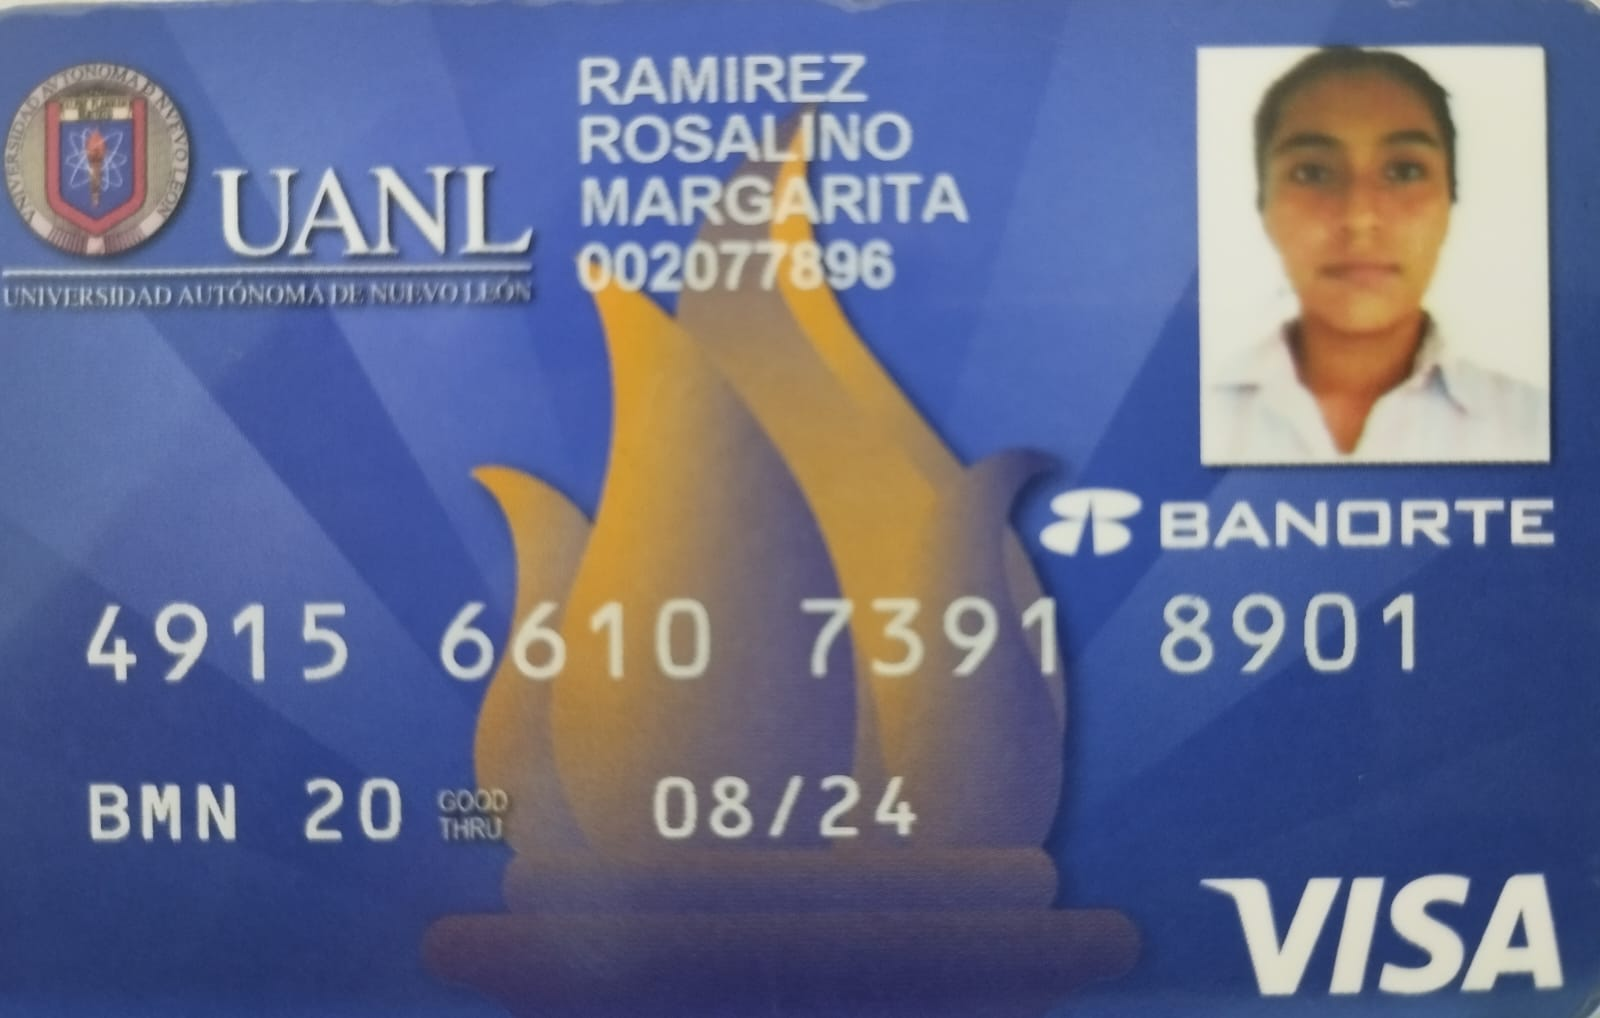**

**Importamos librerias**

In [38]:

import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


**Importamos el set de datos**

In [40]:

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Se mapea cada imagen para que corresponda a un etiqueta única**

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

**Se hace un preprocesamiento del set de datos**

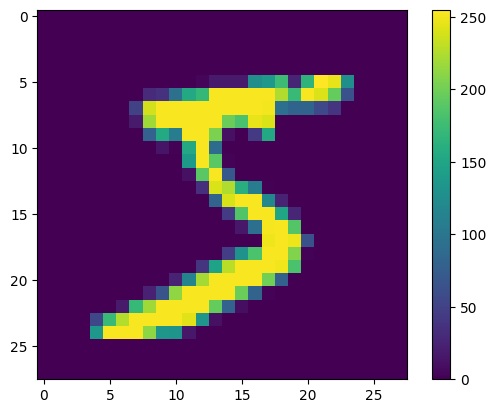

In [9]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Se escalan valores de un rango de 0 a 1**

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Se despliegan las primeras 25 imagenes del set de entrenamiento con su nombre**

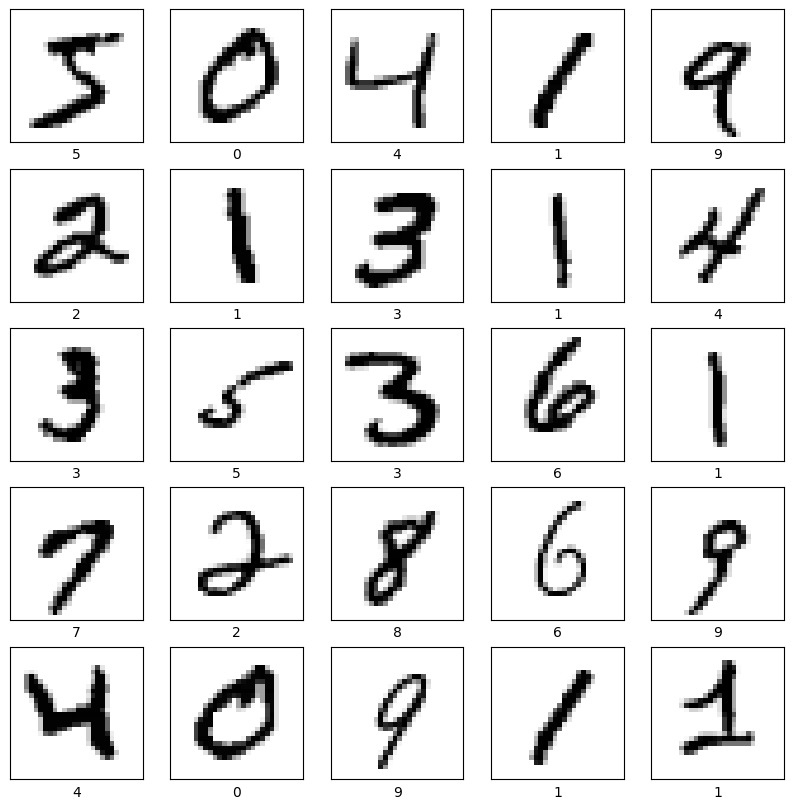

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Configuramos las capas**

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Se inicia la compilación**

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Se ejeccuta método model.fit**

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1122 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0780 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.016

**Evaluación de exactitud**

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0813 - accuracy: 0.9789 - 648ms/epoch - 2ms/step

Test accuracy: 0.9789000153541565


**Se hacen predicciones**

In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [19]:
predictions[0]

array([3.1179146e-12, 3.5207324e-14, 1.2473404e-06, 9.5829807e-07,
       3.8645692e-15, 8.3751875e-13, 5.8988532e-17, 9.9999779e-01,
       6.3148348e-10, 1.9716035e-09], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
test_labels[0]

7

**Graficación**

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Se selecciona una imagen a visualizar así como sus predicciones y el arreglo de sus predicciones**

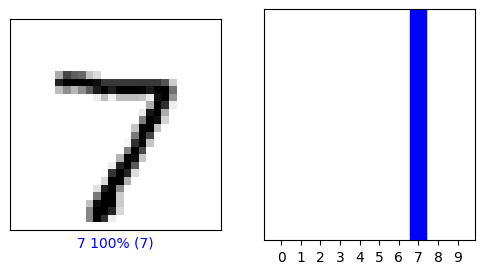

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

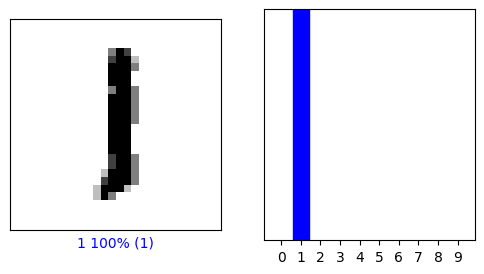

In [41]:
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Se hace una ejemplificacion de graficacion de varias imagenes con sus errores**

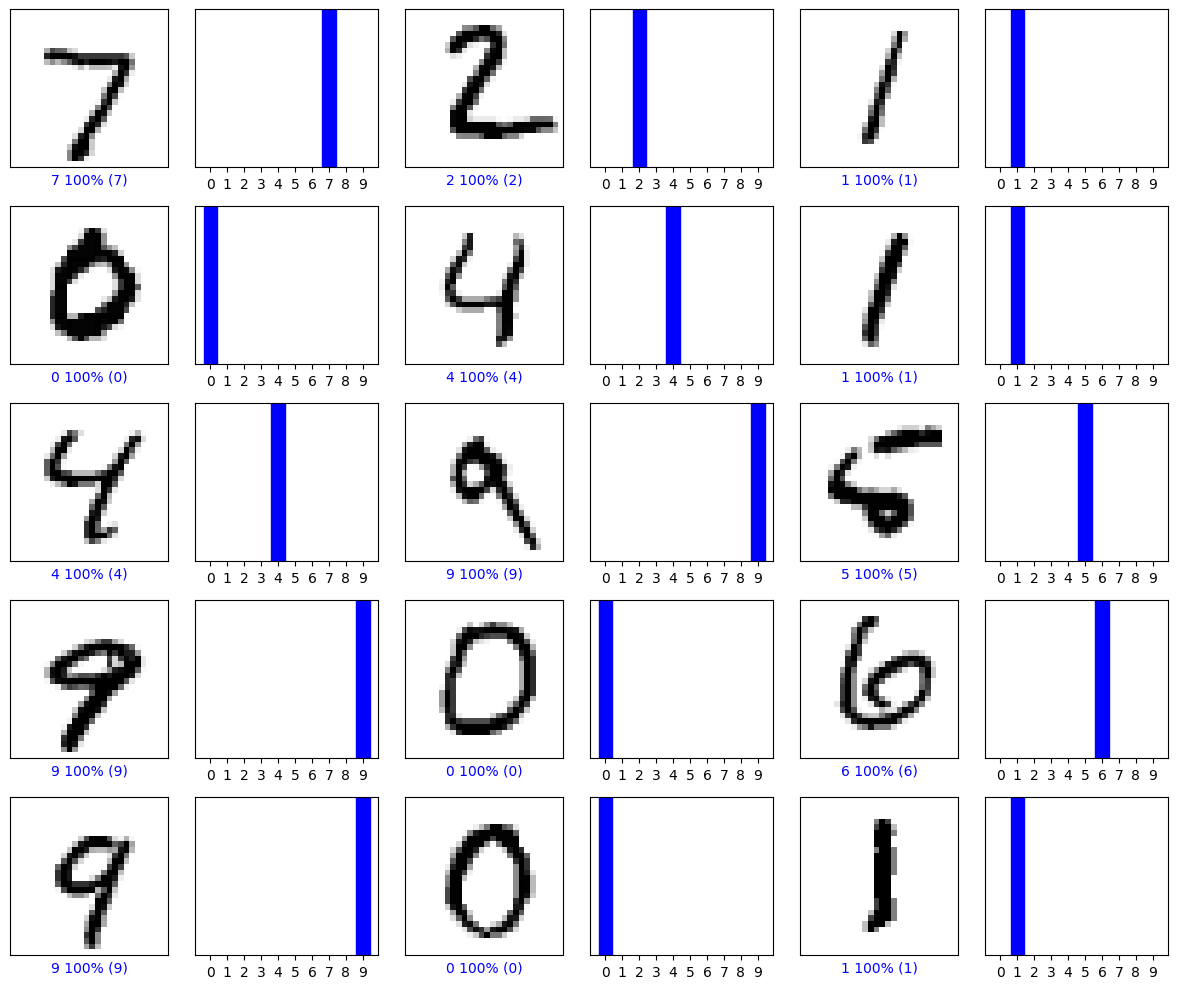

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Grabar una imagen desde el set de datos**

In [45]:
img = test_images[1]

print(img.shape)

(28, 28)


**Adjuntar la imagen al batch donde está el miembro único**

In [46]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


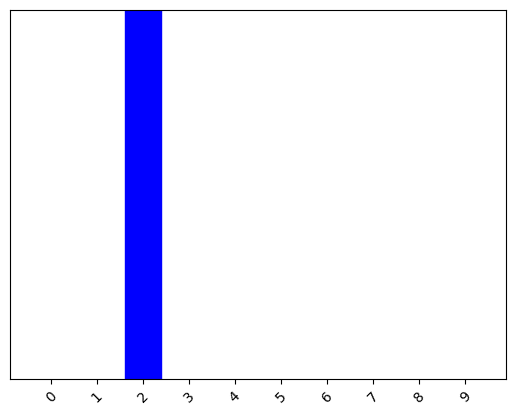

In [50]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)